N.H. Prater 

In [1]:
# Tratamiento de los datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Preprocesado y análisis
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error

# Preprocesado y modelado
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("DatosPrater.csv",encoding = "ISO-8859-1")
data.head(10)

,OBSERVACION,Y,x1,x2,x3,x4
0,1,6.9,38.4,6.1,220,235
1,2,14.4,40.3,4.8,231,307
2,3,7.4,40.0,6.1,217,212
3,4,8.5,31.8,0.2,316,365
4,5,8.0,40.8,3.5,210,218
5,6,2.8,41.3,1.8,267,235
6,7,5.0,38.1,1.2,274,285
7,8,12.2,50.8,8.6,190,205
8,9,10.0,32.2,5.2,236,267
9,10,15.2,38.4,6.1,220,300


**ANÁLISIS EXPLORATORIO DE LOS DATOS**

In [3]:
# Eliminar la columna "OBSERVACION" del Dataset y crear el nuevo objeto DataFrame dataLessObservation
dataLessObservation = data.drop(['OBSERVACION'], axis=1)
dataLessObservation.head()

,Y,x1,x2,x3,x4
0,6.9,38.4,6.1,220,235
1,14.4,40.3,4.8,231,307
2,7.4,40.0,6.1,217,212
3,8.5,31.8,0.2,316,365
4,8.0,40.8,3.5,210,218


In [4]:
# Nombre de las columnas del nuevo DataFrame
columns = dataLessObservation.columns
columns

Index(['Y', 'x1', 'x2', 'x3', 'x4'], dtype='object')

In [5]:
# Tipo de cada columna
dataLessObservation.dtypes

Y     float64
x1    float64
x2    float64
x3      int64
x4      int64
dtype: object

In [6]:
dataLessObservation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       32 non-null     float64
 1   x1      32 non-null     float64
 2   x2      32 non-null     float64
 3   x3      32 non-null     int64  
 4   x4      32 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 1.4 KB


In [7]:
# Dimensión del Dataset
dataLessObservation.shape

(32, 5)

In [8]:
# Número de datos ausentes por variable
dataLessObservation.isna().sum().sort_values()

Y     0
x1    0
x2    0
x3    0
x4    0
dtype: int64

/home/jose/Descargas/tion/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


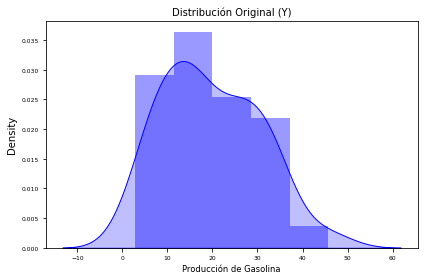

In [9]:
# Distribución de la variable respuesta

fig, axes = plt.subplots(nrows=1, ncols=1)
sns.distplot(
    dataLessObservation.Y,
    hist    = True,
    kde = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax = axes
)
axes.set_title("Distribución Original (Y)", fontsize = 'medium')
axes.set_xlabel('Producción de Gasolina', fontsize='small') 
axes.tick_params(labelsize = 6)
fig.tight_layout()

In [10]:
from fitter import Fitter, get_common_distributions
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(dataLessObservation.Y, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=5, plot=False)

,sumsquare_error,aic,bic,kl_div
beta,0.149265,786.248629,-157.905725,inf
chi2,0.151666,810.603127,-160.860702,inf
gamma,0.151666,810.603242,-160.860699,inf
norm,0.154039,815.688218,-163.829567,inf
logistic,0.155688,823.335328,-163.488926,inf


In [11]:
y = dataLessObservation['Y']
y.head()

0     6.9
1    14.4
2     7.4
3     8.5
4     8.0
Name: Y, dtype: float64

**Análisis de normalidad de la variable de respuesta**

**GRÁFICO**

La media muestral: x_barra=19.659375 y la desviación estándar muestral: s= 10.553549739749892
19.659375
10.722417258008509


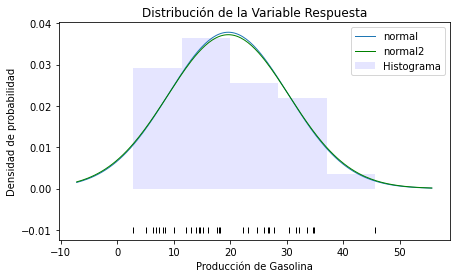

In [12]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
x_1, s1 = stats.norm.fit(y)
print('La media muestral: x_barra=' + str(x_1) + ' y la desviación estándar muestral: s= ' + str(s1))

# numpy 
x_2 = np.mean(y)
s2 = np.std(y,ddof=1)
print(x_2)
print(s2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(y)-10, max(y)+10, num=200)
y_hat = stats.norm.pdf(x_hat, x_1, s1)
y_hat2 = stats.norm.pdf(x_hat, x_2, s2)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=1, label='normal')
ax.plot(x_hat, y_hat2, linewidth=1, color="green", label='normal2')
ax.hist(x=y, density=True, bins=5, color="blue", alpha=0.1, label='Histograma')
ax.plot(y, np.full_like(y, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de la Variable Respuesta')
ax.set_xlabel('Producción de Gasolina')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

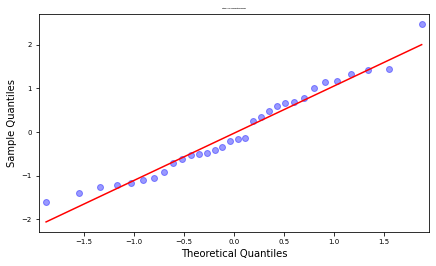

In [13]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    y,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la producción de gasolina', fontsize = 1,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

La distribución de la variable respuesta *(producción de Gasolina)* parece indicar que se ajusta a una distribución normal.

**Métodos analíticos asimetría y curtosis**

In [14]:
print('Kursotis:', stats.kurtosis(y))
print('Skewness:', stats.skew(y))

Kursotis: -0.6560609658686043
Skewness: 0.3867345741102473


Distribución platicúrtica con una ligera asimetría positiva.

**Contraste de hipótesis**

$H_0 =$ La distribución de los datos se ajusta a una distribución normal y $H_1 =$ La distribución de los datos NO se ajusta a una distribución normal.

Si el nivel de significancia es $\alpha=0.05$ ...

In [15]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(y)
shapiro_test

ShapiroResult(statistic=0.9603989124298096, pvalue=0.2816575765609741)

In [16]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(y)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 1.495439390455303, p-value = 0.47344492148294803


En ambos test el p-value > $\alpha$... indicando que no existe evidencia suficiente para rechazar la hipótesis nula $H_0$.

**VARIABLES PREDICTORAS-INDEPENDIENTES NUMÉRICAS**

In [17]:
# Variables numéricas
# ==============================================================================
dataLessObservation.select_dtypes(include=['float64', 'int']).describe()

,Y,x1,x2,x3,x4
count,32.000000,32.000000,32.00000,32.000000,32.000000
mean,19.659375,39.250000,4.18125,241.500000,332.093750
std,10.722417,5.635429,2.61983,37.541375,69.755961
min,2.800000,31.800000,0.20000,190.000000,205.000000
25%,11.650000,36.625000,1.80000,217.000000,274.500000
50%,17.800000,40.000000,4.80000,231.000000,349.000000
75%,27.050000,40.925000,6.10000,268.750000,383.000000
max,45.700000,50.800000,8.60000,316.000000,444.000000


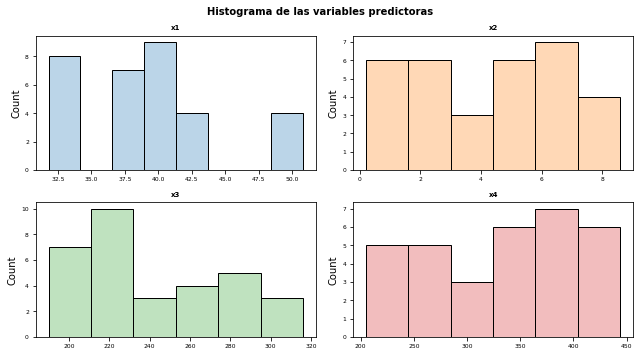

In [18]:
# Gráfico de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dataLessObservation.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Y')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = dataLessObservation,
        x       = colum,
        stat    = "count",
        kde     = False,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Histograma de las variables predictoras', fontsize = 10, fontweight = "bold");

In [19]:
# Valores observados de las variables predictoras
# ==============================================================================
# dataLessObservation.x1.value_counts()
# dataLessObservation.x2.value_counts()
# dataLessObservation.x3.value_counts()
# dataLessObservation.x4.value_counts()

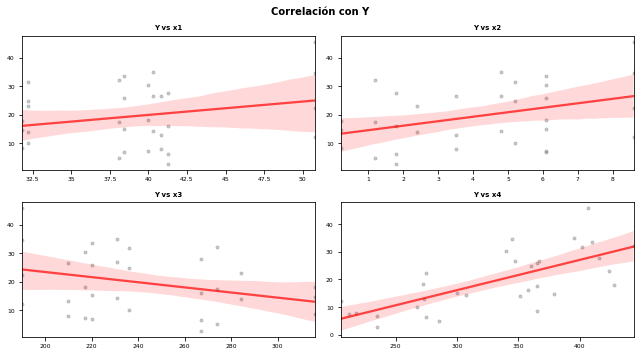

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = dataLessObservation.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Y')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = dataLessObservation[colum],
        y           = dataLessObservation['Y'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Y vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Y', fontsize = 10, fontweight = "bold");

In [21]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = dataLessObservation.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
13,x2,x3,-0.906225,0.906225
17,x3,x2,-0.906225,0.906225
20,x4,Y,0.711526,0.711526
4,Y,x4,0.711526,0.711526
8,x1,x3,-0.700154,0.700154
16,x3,x1,-0.700154,0.700154
11,x2,x1,0.620587,0.620587
7,x1,x2,0.620587,0.620587
19,x3,x4,0.412247,0.412247
23,x4,x3,0.412247,0.412247


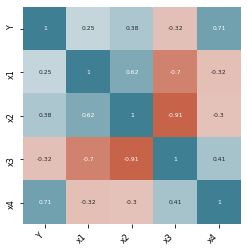

In [22]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [23]:
variablesPredictoras = dataLessObservation.drop(['Y'], axis=1)
variablesPredictoras .head()

,x1,x2,x3,x4
0,38.4,6.1,220,235
1,40.3,4.8,231,307
2,40.0,6.1,217,212
3,31.8,0.2,316,365
4,40.8,3.5,210,218


**El Modelo**

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \varepsilon
$$

In [24]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = variablesPredictoras, y = y)

LinearRegression()

In [25]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(variablesPredictoras.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(variablesPredictoras, y))

Intercept: -6.820774068267955
Coeficiente: [('x1', 0.227245951508298), ('x2', 0.553726210390523), ('x3', -0.14953561805056306), ('x4', 0.15465009357623521)]
Coeficiente de determinación R^2: 0.9621770360720396


La ecuación de regresión estimada es:

$$
y = -6.82 + 0.23 x_1 + 0.55 x_2 -0.15 x_3 + 0.15 x_4
$$

In [26]:
X = sm.add_constant(variablesPredictoras, prepend=True)
modelo = sm.OLS(endog=y, exog=X)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     171.7
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           8.82e-19
Time:                        18:29:02   Log-Likelihood:                -68.415
No. Observations:                  32   AIC:                             146.8
Df Residuals:                      27   BIC:                             154.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8208     10.123     -0.674      0.5

Prueba de la hipótesis nula $H_0$ 
$$
H_0 = \beta_1=\beta_2=\beta_3=\beta_4=0
$$
contra la hipótesis alternativa $H_1 = \beta_j \neq 0$ para algún $j=1,...,4$.

El valor del estadístico *F* es $171.7$ y el *p-value* es $8.82e-19$. Como *p-value* $\approx 0$ hay evidencia suficiente para rechazar la hipótesis nula y concluir que al menos uno de los coefientes de regresión es distinto de cero. El coeficiente de correlación/determinación múltiple $R^2$ es $0.962$, lo cuál indica que alrededor del $96.2$% de la variación total de la producción de gasolina con respecto a su media puede explicarse por las cuatro variables predictoras incluidas en la ecuación de regresión.

In [27]:
# Error Cuadrático Medio
# ==============================================================================
X_ = sm.add_constant(variablesPredictoras, prepend=True)
predicciones = modelo.predict(exog = X_)
rmse = mean_squared_error(
        y_true  = y,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error cuadrático medio (RMSE) es: {rmse}")


El error cuadrático medio (RMSE) es: 2.0524677441076786


In [28]:
# Estimador no sesgado de la desviación estándar del error
# ==============================================================================
n, k = variablesPredictoras.shape
m = k+1
s = np.sqrt((np.sum((y-predicciones)**2)/(n-m)))
print("")
print(f" s_hat es: {s}")


 s_hat es: 2.2344438607044834


**CONCLUSIONES:**
* La variable respuesta/dependiente se ajusta a una distribución normal.
* Se rechazo la hipótesis nula de que todos los coeficientes de regresión (excepto el término constante) son iguales a cero.
* El valor del coeficiente de determinación/correlación es alto (0.9622), es decir, que el $96.2$% de la variación total de la producción de gasolina con respecto a su media puede explicarse por las cuatro variables predictoras incluidas en la ecuación de regresión.
* Las desviaciones estándar de los estimadores de mínimos cuadrados para $\beta_0$ y $\beta_2$ son grandes, lo que sugiere que $x_2$, y posiblemente otras variables predictoras sean estadísticamente significativas, es decir, pueda que $x_2$ y otras variables de predicción incluidas en el modelo NO tengan un gran efecto sobre la producción de gasolina (Y).
* Problema de Multicolinealidad.

**DETERMINACIÓN DEL MEJOR CONJUNTO DE VARIABLES PREDICTORAS-PROBLEMA DE SELECCIÓN DE VARIABLES EN ANÁLISIS DE REGRESIÓN**

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array 
X_new = SelectKBest(score_func=f_regression, k=2).fit_transform(variablesPredictoras, y)

**ANÁLISIS DE LOS RESIDUOS O RESIDUALES**

*Paul A. Samuelson... "al científico que hace predicciones le recomiendo que estudie siempre los residuales"*
